# Feature Engineering for Machine Learning in Python

## 1. Creating Features

Dataset is related to https://insights.stackoverflow.com/survey/2018/#overview.

In [117]:
so_survey_csv = 'https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv'

In [157]:
# Import pandas
import pandas as pd

# Import so_survey_csv into so_survey_df
so_survey_df = pd.read_csv(so_survey_csv)

# Print the first five rows of the DataFrame
so_survey_df.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


In [119]:
# Print the data type of each column
print(so_survey_df.dtypes)

SurveyDate                     object
FormalEducation                object
ConvertedSalary               float64
Hobby                          object
Country                        object
StackOverflowJobsRecommend    float64
VersionControl                 object
Age                             int64
Years Experience                int64
Gender                         object
RawSalary                      object
dtype: object


Answer: Numeric

In [120]:
# Create subset of only the numeric columns
so_numeric_df = so_survey_df.select_dtypes(include=['int', 'float'])

# Print the column names contained in so_survey_df_num
print(so_numeric_df.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


In [121]:
# Convert the Country column to a one hot encoded Data Frame
one_hot_encoded = pd.get_dummies(so_survey_df, columns=['Country'], prefix='OH')

# Print the columns names
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


In [122]:
# Create dummy variables for the Country column
dummy = pd.get_dummies(so_survey_df, columns=['Country'], drop_first=True, prefix='DM')

# Print the columns names
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


In [123]:
# Create a series out of the Country column
countries = so_survey_df.Country

# Get the counts of each category
country_counts = countries.value_counts()

# Print the count values for each category
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


In [124]:
# Create a mask for only categories that occur less than 10 times
mask = countries.isin(country_counts[country_counts.values < 10].index)

# Print the top 5 rows in the mask series
print(mask.head())

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


In [125]:
# Label all other categories as Other
countries[mask] = 'Other'

# Print the updated category counts
print(countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\753486482.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries[mask] = 'Other'


In [126]:
so_survey_df['ConvertedSalary'] = so_survey_df['ConvertedSalary'].fillna(0)

In [127]:
# Create the Paid_Job column filled with zeros
so_survey_df['Paid_Job'] = 0

# Replace all the Paid_Job values where ConvertedSalary is > 0
so_survey_df.loc[so_survey_df['ConvertedSalary'] > 0, 'Paid_Job'] = 1

# Print the first five rows of the columns
so_survey_df[['Paid_Job', 'ConvertedSalary']].head()

,Paid_Job,ConvertedSalary
0,0,0.0
1,1,70841.0
2,0,0.0
3,1,21426.0
4,1,41671.0


In [128]:
# Bin the continuous variable ConvertedSalary into 5 bins
so_survey_df['equal_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=5)

# Print the first 5 rows of the equal_binned column
so_survey_df[['equal_binned', 'ConvertedSalary']].head()

,equal_binned,ConvertedSalary
0,"(-2000.0, 400000.0]",0.0
1,"(-2000.0, 400000.0]",70841.0
2,"(-2000.0, 400000.0]",0.0
3,"(-2000.0, 400000.0]",21426.0
4,"(-2000.0, 400000.0]",41671.0


In [129]:
# Import numpy
import numpy as np

# Specify the boundaries of the bins
bins = [-np.inf, 10000, 50000, 100000, 150000, np.inf]

# Bin labels
labels = ['Very low', 'Low', 'Medium', 'High', 'Very high']

# Bin the continuous variable ConvertedSalary using these boundaries
so_survey_df['boundary_binned'] = pd.cut(so_survey_df['ConvertedSalary'], bins=bins, labels=labels)

# Print the first 5 rows of the boundary_binned column
so_survey_df[['boundary_binned', 'ConvertedSalary']].head()

,boundary_binned,ConvertedSalary
0,Very low,0.0
1,Medium,70841.0
2,Very low,0.0
3,Low,21426.0
4,Low,41671.0


## 2. Dealing with Messy Data

In [130]:
# Subset the DataFrame
sub_df = so_survey_df[['Age', 'Gender']]

# Print the number of non-missing values
print(sub_df.notnull().sum())

Age       999
Gender    693
dtype: int64


Answer: 693

In [131]:
# Print the top 10 entries of the DataFrame
sub_df.head(10)

,Age,Gender
0,21,Male
1,38,Male
2,45,NaN
3,46,Male
4,39,Male
5,39,Male
6,34,Male
7,24,Female
8,23,Male
9,36,NaN


In [132]:
# Print the locations of the missing values
sub_df.head(10).isnull()

,Age,Gender
0,False,False
1,False,False
2,False,True
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,True


In [133]:
# Print the locations of the non-missing values
sub_df.head(10).notnull()

,Age,Gender
0,True,True
1,True,True
2,True,False
3,True,True
4,True,True
5,True,True
6,True,True
7,True,True
8,True,True
9,True,False


In [134]:
# Print the number of rows and columns
print(so_survey_df.shape)

(999, 14)


In [135]:
# Create a new DataFrame dropping all incomplete rows
no_missing_values_rows = so_survey_df.dropna()

# Print the shape of the new DataFrame
print(no_missing_values_rows.shape)

(264, 14)


In [136]:
# Create a new DataFrame dropping all columns with incomplete rows
no_missing_values_cols = so_survey_df.dropna(how='any', axis=1)

# Print the shape of the new DataFrame
print(no_missing_values_cols.shape)

(999, 11)


In [137]:
# Drop all rows where Gender is missing
no_gender = so_survey_df.dropna(subset=['Gender'])

# Print the shape of the new DataFrame
print(no_gender.shape)

(693, 14)


In [138]:
# Print the count of occurrences
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [139]:
# Replace missing values
so_survey_df['Gender'].fillna('Not Given', inplace=True)

# Print the count of each value
print(so_survey_df['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [140]:
# Print the first five rows of StackOverflowJobsRecommend column
so_survey_df[['StackOverflowJobsRecommend']].head()

,StackOverflowJobsRecommend
0,NaN
1,7.0
2,8.0
3,NaN
4,8.0


In [141]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Print the first five rows of StackOverflowJobsRecommend column
so_survey_df[['StackOverflowJobsRecommend']].head()

,StackOverflowJobsRecommend
0,7.061602
1,7.000000
2,8.000000
3,7.061602
4,8.000000


In [142]:
# Fill missing values with the mean
so_survey_df['StackOverflowJobsRecommend'].fillna(so_survey_df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
so_survey_df['StackOverflowJobsRecommend'] = np.round(so_survey_df['StackOverflowJobsRecommend'])

# Print the top 5 rows
so_survey_df[['StackOverflowJobsRecommend']].head()

,StackOverflowJobsRecommend
0,7.0
1,7.0
2,8.0
3,7.0
4,8.0


Answer: Apply the measures of central tendency (mean/median etc.) calculated on the train set to both the train and test sets.

In [113]:
# Remove the commas in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace(',', '')

In [114]:
# Remove the dollar signs in the column
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\2004874406.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('$', '')


In [49]:
# Attempt to convert the column to numeric values
numeric_vals = pd.to_numeric(so_survey_df['RawSalary'], errors='coerce')

# Find the indexes of missing values
idx = numeric_vals.isnull()

# Print the relevant rows
so_survey_df[['RawSalary']][idx]

,RawSalary
0,NaN
2,NaN
4,£41671.00
6,NaN
8,NaN
...,...
989,NaN
990,NaN
992,NaN
994,NaN


In [115]:
# Replace the offending characters
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].str.replace('£', '')

# Convert the column to float
so_survey_df['RawSalary'] = so_survey_df['RawSalary'].astype('float')

# Print the column
so_survey_df[['RawSalary']]

,RawSalary
0,NaN
1,70841.0
2,NaN
3,21426.0
4,41671.0
...,...
994,NaN
995,58746.0
996,55000.0
997,NaN


In [143]:
# Use method chaining
so_survey_df['RawSalary'] = so_survey_df['RawSalary']\
                              .str.replace(',', '')\
                              .str.replace('$', '')\
                              .str.replace('£', '')\
                              .astype('float')
 
# Print the RawSalary column
so_survey_df[['RawSalary']]

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\2825054761.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  .str.replace('$', '')\


,RawSalary
0,NaN
1,70841.0
2,NaN
3,21426.0
4,41671.0
...,...
994,NaN
995,58746.0
996,55000.0
997,NaN


## 3. Conforming to Statistical Assumptions

In [158]:
so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]
so_numeric_df.head()

,ConvertedSalary,Age,Years Experience
0,NaN,21,13
1,70841.0,38,9
2,NaN,45,11
3,21426.0,46,12
4,41671.0,39,7


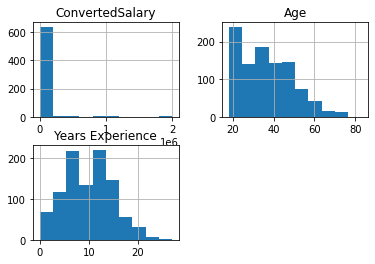

In [159]:
import matplotlib.pyplot as plt

# Create a histogram
so_numeric_df.hist()
plt.show()

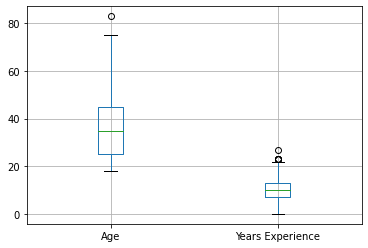

In [160]:
# Create a boxplot of two columns
so_numeric_df[['Age', 'Years Experience']].boxplot()
plt.show()

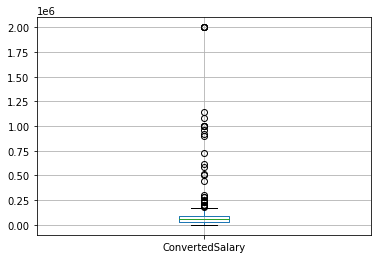

In [161]:
# Create a boxplot of ConvertedSalary
so_numeric_df[['ConvertedSalary']].boxplot()
plt.show()

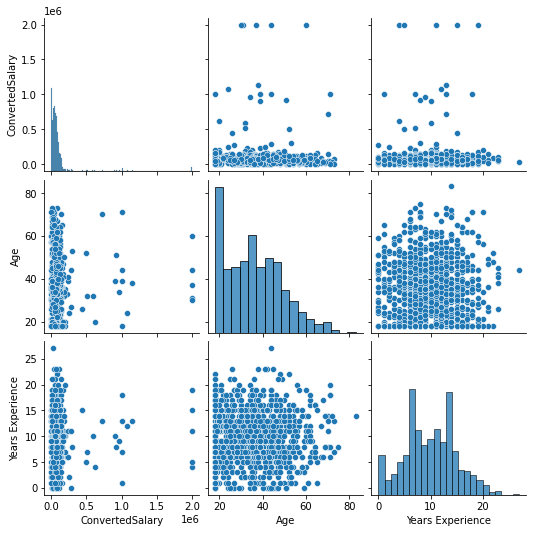

In [162]:
# Import packages
import matplotlib.pyplot as plt
import seaborn as sns

# Plot pairwise relationships
sns.pairplot(so_numeric_df)

# Show plot
plt.show()

In [163]:
# Print summary statistics
so_numeric_df.describe()

,ConvertedSalary,Age,Years Experience
count,6.650000e+02,999.000000,999.000000
mean,9.256517e+04,36.003003,9.961962
std,2.091344e+05,13.255127,4.878129
min,0.000000e+00,18.000000,0.000000
25%,2.755000e+04,25.000000,7.000000
50%,5.556200e+04,35.000000,10.000000
75%,8.823800e+04,45.000000,13.000000
max,2.000000e+06,83.000000,27.000000


Answer: Decision Trees

In [164]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler 

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
so_numeric_df[['Age_MM', 'Age']].head()

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\3609497146.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_MM'] = MM_scaler.transform(so_numeric_df[['Age']])


,Age_MM,Age
0,0.046154,21
1,0.307692,38
2,0.415385,45
3,0.430769,46
4,0.323077,39


In [165]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(so_numeric_df[['Age']])

# Transform the data using the fitted scaler
so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])

# Compare the origional and transformed column
so_numeric_df[['Age_SS', 'Age']].head()

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\3072780740.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['Age_SS'] = SS_scaler.transform(so_numeric_df[['Age']])


,Age_SS,Age
0,-1.132431,21
1,0.150734,38
2,0.679096,45
3,0.754576,46
4,0.226214,39


C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\3655555814.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])


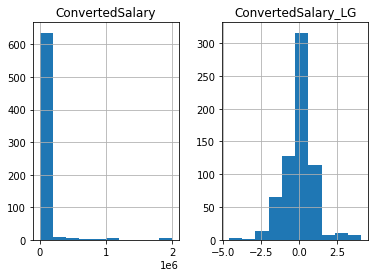

In [166]:
# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(so_numeric_df[['ConvertedSalary']])

# Apply the power transform to the data
so_numeric_df['ConvertedSalary_LG'] = pow_trans.transform(so_numeric_df[['ConvertedSalary']])

# Plot the data before and after the transformation
so_numeric_df[['ConvertedSalary', 'ConvertedSalary_LG']].hist()
plt.show()

Answer: When you know the the data has a strict upper and lower bound.

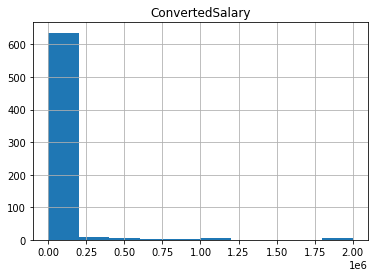

<Figure size 432x288 with 0 Axes>

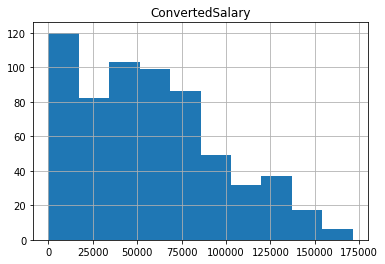

In [167]:
# Find the 95th quantile
quantile = so_numeric_df['ConvertedSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = so_numeric_df[so_numeric_df['ConvertedSalary'] < quantile]

# The original histogram
so_numeric_df[['ConvertedSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['ConvertedSalary']].hist()
plt.show()

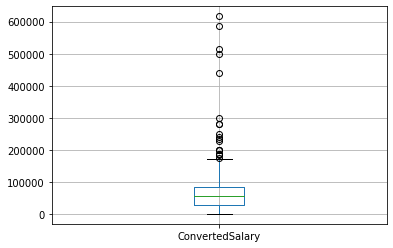

In [168]:
# Find the mean and standard dev
std = so_numeric_df['ConvertedSalary'].std()
mean = so_numeric_df['ConvertedSalary'].mean()

# Calculate the cutoff
cut_off = std * 3
lower, upper = mean - cut_off, mean + cut_off

# Trim the outliers
trimmed_df = so_numeric_df[(so_numeric_df['ConvertedSalary'] < upper) & (so_numeric_df['ConvertedSalary'] > lower)]

# The trimmed box plot
trimmed_df[['ConvertedSalary']].boxplot()
plt.show()

In [174]:
from sklearn.model_selection import train_test_split

so_numeric_df = so_survey_df[['ConvertedSalary', 'Age', 'Years Experience']]

so_train_numeric, so_test_numeric = so_numeric_df[:700], so_numeric_df[700:]

In [175]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Apply a standard scaler to the data
SS_scaler = StandardScaler()

# Fit the standard scaler to the data
SS_scaler.fit(so_train_numeric[['Age']])

# Transform the test data using the fitted scaler
so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])
so_test_numeric[['Age', 'Age_ss']].head()

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\2971359040.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  so_test_numeric['Age_ss'] = SS_scaler.transform(so_test_numeric[['Age']])


,Age,Age_ss
700,35,-0.069265
701,18,-1.343218
702,47,0.829997
703,57,1.579381
704,41,0.380366


In [177]:
train_std = so_train_numeric['ConvertedSalary'].std()
train_mean = so_train_numeric['ConvertedSalary'].mean()

cut_off = train_std * 3
train_lower, train_upper = train_mean - cut_off, train_mean + cut_off

# Trim the test DataFrame
trimmed_df = so_test_numeric[(so_test_numeric['ConvertedSalary'] < train_upper) \
                             & (so_test_numeric['ConvertedSalary'] > train_lower)]

trimmed_df

,ConvertedSalary,Age,Years Experience,Age_ss
700,36716.0,35,13,-0.069265
701,200000.0,18,20,-1.343218
703,10476.0,57,19,1.579381
707,42672.0,29,9,-0.518895
708,23614.0,46,15,0.755058
...,...,...,...,...
988,50448.0,18,4,-1.343218
991,55562.0,34,1,-0.144203
993,30000.0,28,5,-0.593834
995,58746.0,27,16,-0.668772


## 4. Dealing with Text Data

In [178]:
speech_df = pd.read_csv('inaugural_speeches.csv')
speech_df.head()

,Name,Inaugural Address,Date,text
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t..."
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica..."


In [180]:
# Print the first 5 rows of the text column
speech_df[['text']].head()

,text
0,Fellow-Citizens of the Senate and of the House...
1,Fellow Citizens: I AM again called upon by th...
2,"WHEN it was first perceived, in early times, t..."
3,Friends and Fellow-Citizens: CALLED upon to u...
4,"PROCEEDING, fellow-citizens, to that qualifica..."


In [181]:
# Replace all non letter characters with a whitespace
speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')

# Change to lower case
speech_df['text_clean'] = speech_df['text_clean'].str.lower()

# Print the first 5 rows of the text_clean column
speech_df[['text_clean']].head()

C:\Users\Erturk Memmedli\AppData\Local\Temp\ipykernel_13968\1175046078.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  speech_df['text_clean'] = speech_df['text'].str.replace('[^a-zA-Z]', ' ')


,text_clean
0,fellow citizens of the senate and of the house...
1,fellow citizens i am again called upon by th...
2,when it was first perceived in early times t...
3,friends and fellow citizens called upon to u...
4,proceeding fellow citizens to that qualifica...


In [182]:
# Find the length of each text
speech_df['char_cnt'] = speech_df['text_clean'].str.len()

# Count the number of words in each text
speech_df['word_cnt'] = speech_df['text_clean'].str.split().str.len()

# Find the average length of word
speech_df['avg_word_length'] = speech_df['char_cnt'] / speech_df['word_cnt']

# Print the first 5 rows of these columns
speech_df[['text_clean', 'char_cnt', 'word_cnt', 'avg_word_length']].head()

,text_clean,char_cnt,word_cnt,avg_word_length
0,fellow citizens of the senate and of the house...,8616,1432,6.016760
1,fellow citizens i am again called upon by th...,787,135,5.829630
2,when it was first perceived in early times t...,13871,2323,5.971158
3,friends and fellow citizens called upon to u...,10144,1736,5.843318
4,proceeding fellow citizens to that qualifica...,12902,2169,5.948363


In [188]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer
cv = CountVectorizer()

# Fit the vectorizer
cv.fit(speech_df['text_clean'])

# Print feature names
print(cv.get_feature_names_out())

['abandon' 'abandoned' 'abandonment' ... 'zealous' 'zealously' 'zone']


In [189]:
# Apply the vectorizer
cv_transformed = cv.transform(speech_df['text_clean'])

# Print the full array
cv_array = cv_transformed.toarray()
print(cv_array)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [190]:
# Print the shape of cv_array
print(cv_array.shape)

(58, 9043)


In [191]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Specify arguements to limit the number of features generated
cv = CountVectorizer(min_df=0.2, max_df=0.8)

# Fit, transform, and convert into array
cv_transformed = cv.fit_transform(speech_df['text_clean'])
cv_array = cv_transformed.toarray()

# Print the array shape
print(cv_array.shape)

(58, 818)


In [193]:
# Create a DataFrame with these features
cv_df = pd.DataFrame(cv_array, columns=cv.get_feature_names_out()).add_prefix('Counts_')

# Add the new columns to the original DataFrame
speech_df_new = pd.concat([speech_df, cv_df], axis=1, sort=False)
speech_df_new.head()

,Name,Inaugural Address,Date,text,text_clean,char_cnt,word_cnt,avg_word_length,Counts_abiding,Counts_ability,...,Counts_women,Counts_words,Counts_work,Counts_wrong,Counts_year,Counts_years,Counts_yet,Counts_you,Counts_young,Counts_your
0,George Washington,First Inaugural Address,"Thursday, April 30, 1789",Fellow-Citizens of the Senate and of the House...,fellow citizens of the senate and of the house...,8616,1432,6.016760,0,0,...,0,0,0,0,0,1,0,5,0,9
1,George Washington,Second Inaugural Address,"Monday, March 4, 1793",Fellow Citizens: I AM again called upon by th...,fellow citizens i am again called upon by th...,787,135,5.829630,0,0,...,0,0,0,0,0,0,0,0,0,1
2,John Adams,Inaugural Address,"Saturday, March 4, 1797","WHEN it was first perceived, in early times, t...",when it was first perceived in early times t...,13871,2323,5.971158,0,0,...,0,0,0,0,2,3,0,0,0,1
3,Thomas Jefferson,First Inaugural Address,"Wednesday, March 4, 1801",Friends and Fellow-Citizens: CALLED upon to u...,friends and fellow citizens called upon to u...,10144,1736,5.843318,0,0,...,0,0,1,2,0,0,2,7,0,7
4,Thomas Jefferson,Second Inaugural Address,"Monday, March 4, 1805","PROCEEDING, fellow-citizens, to that qualifica...",proceeding fellow citizens to that qualifica...,12902,2169,5.948363,0,0,...,0,0,0,0,2,2,2,4,0,4


In [194]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(speech_df['text_clean'])

# Create a DataFrame with these features
tv_df = pd.DataFrame(tv_transformed.toarray(), columns=tv.get_feature_names_out()).add_prefix('TFIDF_')
tv_df.head()

,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_americans,TFIDF_believe,TFIDF_best,TFIDF_better,TFIDF_change,TFIDF_citizens,...,TFIDF_things,TFIDF_time,TFIDF_today,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.133415,0.000000,0.105388,0.0,0.000000,0.000000,0.000000,0.000000,0.229644,...,0.000000,0.045929,0.0,0.136012,0.203593,0.000000,0.060755,0.000000,0.045929,0.052694
1,0.000000,0.261016,0.266097,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.179712,...,0.000000,0.000000,0.0,0.000000,0.199157,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.092436,0.157058,0.073018,0.0,0.000000,0.026112,0.060460,0.000000,0.106072,...,0.032030,0.021214,0.0,0.062823,0.070529,0.024339,0.000000,0.000000,0.063643,0.073018
3,0.000000,0.092693,0.000000,0.000000,0.0,0.090942,0.117831,0.045471,0.053335,0.223369,...,0.048179,0.000000,0.0,0.094497,0.000000,0.036610,0.000000,0.039277,0.095729,0.000000
4,0.041334,0.039761,0.000000,0.031408,0.0,0.000000,0.067393,0.039011,0.091514,0.273760,...,0.082667,0.164256,0.0,0.121605,0.030338,0.094225,0.000000,0.000000,0.054752,0.062817


In [195]:
# Isolate the row to be examined
sample_row = tv_df.loc[0]

# Print the top 5 words of the sorted output
sample_row.sort_values(ascending=False).head()

TFIDF_government    0.367430
TFIDF_public        0.333237
TFIDF_present       0.315182
TFIDF_duty          0.238637
TFIDF_country       0.229644
Name: 0, dtype: float64

In [198]:
train_speech_df = speech_df[:45]
test_speech_df = speech_df[45:]

In [199]:
# Instantiate TfidfVectorizer
tv = TfidfVectorizer(max_features=100, stop_words='english')

# Fit the vectroizer and transform the data
tv_transformed = tv.fit_transform(train_speech_df['text_clean'])

# Transform test data
test_tv_transformed = tv.transform(test_speech_df['text_clean'])

# Create new features for the test set
test_tv_df = pd.DataFrame(test_tv_transformed.toarray(), columns=tv.get_feature_names_out()).add_prefix('TFIDF_')
test_tv_df.head()

,TFIDF_action,TFIDF_administration,TFIDF_america,TFIDF_american,TFIDF_authority,TFIDF_best,TFIDF_business,TFIDF_citizens,TFIDF_commerce,TFIDF_common,...,TFIDF_subject,TFIDF_support,TFIDF_time,TFIDF_union,TFIDF_united,TFIDF_war,TFIDF_way,TFIDF_work,TFIDF_world,TFIDF_years
0,0.000000,0.029540,0.233954,0.082703,0.000000,0.000000,0.000000,0.022577,0.0,0.000000,...,0.0,0.000000,0.115378,0.000000,0.024648,0.079050,0.033313,0.000000,0.299983,0.134749
1,0.000000,0.000000,0.547457,0.036862,0.000000,0.036036,0.000000,0.015094,0.0,0.000000,...,0.0,0.019296,0.092567,0.000000,0.000000,0.052851,0.066817,0.078999,0.277701,0.126126
2,0.000000,0.000000,0.126987,0.134669,0.000000,0.131652,0.000000,0.000000,0.0,0.046997,...,0.0,0.000000,0.075151,0.000000,0.080272,0.042907,0.054245,0.096203,0.225452,0.043884
3,0.037094,0.067428,0.267012,0.031463,0.039990,0.061516,0.050085,0.077301,0.0,0.000000,...,0.0,0.098819,0.210690,0.000000,0.056262,0.030073,0.038020,0.235998,0.237026,0.061516
4,0.000000,0.000000,0.221561,0.156644,0.028442,0.087505,0.000000,0.109959,0.0,0.023428,...,0.0,0.023428,0.187313,0.131913,0.040016,0.021389,0.081124,0.119894,0.299701,0.153133


In [200]:
# Import CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a trigram vectorizer
cv_trigram_vec = CountVectorizer(max_features=100, 
                                 stop_words='english', 
                                 ngram_range=(3, 3))

# Fit and apply trigram vectorizer
cv_trigram = cv_trigram_vec.fit_transform(speech_df['text_clean'])

# Print the trigram features
print(cv_trigram_vec.get_feature_names_out())

['ability preserve protect' 'agriculture commerce manufactures'
 'america ideal freedom' 'amity mutual concession' 'anchor peace home'
 'ask bow heads' 'best ability preserve' 'best interests country'
 'bless god bless' 'bless united states' 'chief justice mr'
 'children children children' 'citizens united states'
 'civil religious liberty' 'civil service reform' 'commerce united states'
 'confidence fellow citizens' 'congress extraordinary session'
 'constitution does expressly' 'constitution united states'
 'coordinate branches government' 'day task people'
 'defend constitution united' 'distinction powers granted'
 'distinguished guests fellow' 'does expressly say' 'equal exact justice'
 'era good feeling' 'executive branch government'
 'faithfully execute office' 'fellow citizens assembled'
 'fellow citizens called' 'fellow citizens large' 'fellow citizens world'
 'form perfect union' 'general welfare secure' 'god bless america'
 'god bless god' 'good greatest number' 'government p

In [202]:
# Create a DataFrame of the features
cv_tri_df = pd.DataFrame(cv_trigram.toarray(), 
                 columns=cv_trigram_vec.get_feature_names_out()).add_prefix('Counts_')

# Print the top 5 words in the sorted output
cv_tri_df.sum().sort_values(ascending=False).head()

Counts_constitution united states    20
Counts_people united states          13
Counts_mr chief justice              10
Counts_preserve protect defend       10
Counts_president united states        8
dtype: int64